# Project 2

## Team Members

*Simon Ustoyev

*Elina Azrilyan

*Jack Russo

*Anil Akyildirim

## Introduction

In this project, we chose to use a dataset which includes Scientific collaborations which can be classified as a two-node or afflication network since there are two types of "nodes" which one type of node represents the authors and the other represents the papers. The two-node network is projected onto one-mode networks using the procuder outlined in here: https://toreopsahl.com/tnet/two-mode-networks/projection/ . The weight of the dataset is defined based on the sum of joint papers that authors contributed to.

In [14]:
# Load Packages
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from pylab import rcParams
import seaborn as sns
from pandas import DataFrame
from networkx.algorithms import bipartite

In [15]:
#Reading in the data
df = pd.read_csv('http://opsahl.co.uk/tnet/datasets/Newman-Cond_mat_95-99-co_occurrence.txt', delim_whitespace=True, header=None, names=['author', 'research', 'weight'])
df.head()

,author,research,weight
0,1,190,7
1,1,201,3
2,1,562,2
3,1,1075,3
4,1,2281,1


## Data Exploration

Let's create our Graph to further perform basic analysis and initial visualizations.

In [16]:
G = nx.from_pandas_edgelist(df,  source='author', target='research', edge_attr='weight', create_using=None)

In [17]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 16264\nNumber of edges: 47594\nAverage degree:   5.8527'

We have 16,264 nodes with 47,594 edges. This is a large dataset, so we are going to define and reduce the size of the network based on the sum of joint papers that authors contributed to. (weight) . Let's look at the distribution of the weights to define a threshold.

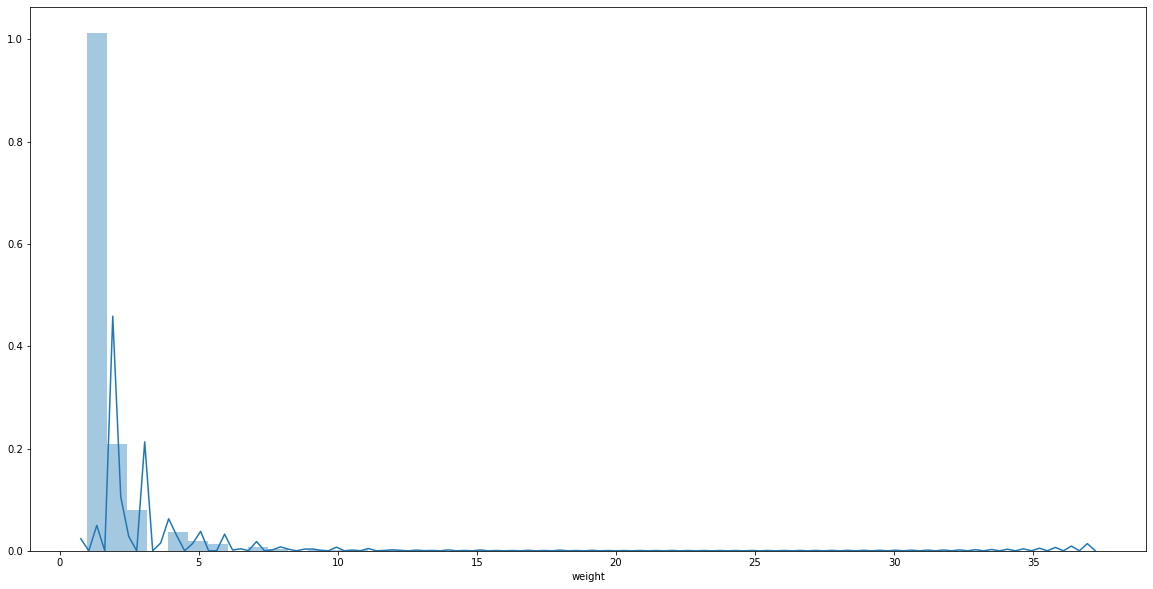

In [18]:
plt.figure(figsize=(20,10))
sns.distplot(df['weight'])

Based on the distribution of the authors contribution, we can look at different segments. We will create two segments one with the weights above 5 and one with less than 5.

In [19]:
#Function that takes the dataframe and weight and plots the graph for all nodes in that category
def island_graph(df_,w):
  return(nx.from_pandas_edgelist(df = (df_[df_['weight'] > w]), source='author', target='research', edge_attr='weight', create_using=None))

In [20]:
G_2=G = island_graph(df_ = df, w = 5)

In [21]:
nx.info(G_2)

'Name: \nType: Graph\nNumber of nodes: 1355\nNumber of edges: 1178\nAverage degree:   1.7387'

When we look at the island with above weight value of 5, we have 1355 nodes with 1178 edges. Let's visualize this graph.

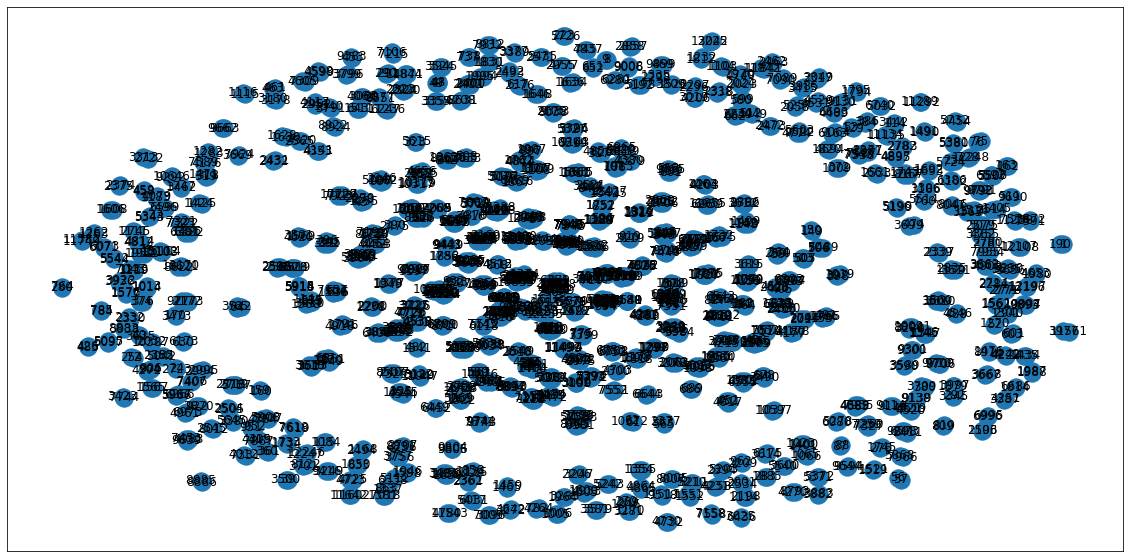

In [22]:
plt.figure(figsize=(20,10))
nx.draw_networkx(G_2)

In [23]:
#Function that takes the dataframe and weight and plots the graph for all nodes in that category
def island_graph_2(df_,w):
  return(nx.from_pandas_edgelist(df = (df_[df_['weight'] < w]), source='author', target='research', edge_attr='weight', create_using=None))

In [24]:
G_3 = island_graph_2(df_ = df, w = 5)

We created two different segments and we want to focus on the authors that has the highest sum of contribution to the scientific researches. We will further look at the degree centrality, betweenness centrality, eigenvector_centrality and closeness centrality.

In [25]:
degree = pd.DataFrame.from_dict(dict(nx.degree(G_2)), orient='index', columns=['Degree'])
degree_centrality = pd.DataFrame.from_dict(nx.degree_centrality(G_2), orient='index', columns=['Degree_Centrality'])
eigenvector_centrality = pd.DataFrame.from_dict(nx.eigenvector_centrality(G_2), orient='index', columns=['Eigenvector_Centrality'])
closeness_centrality = pd.DataFrame.from_dict(nx.closeness_centrality(G_2), orient='index', columns=['Closeness Centrality'])
betweenness_centrality = pd.DataFrame.from_dict(nx.betweenness_centrality(G_2), orient='index', columns=['Betweenness Centrality'])
dfs = [degree,degree_centrality,eigenvector_centrality,closeness_centrality,betweenness_centrality]
metrics = pd.concat([degree, degree_centrality], axis=1, join_axes=[degree.index])
metrics = pd.concat([metrics, eigenvector_centrality], axis=1, join_axes=[metrics.index])
metrics = pd.concat([metrics, closeness_centrality], axis=1, join_axes=[metrics.index])
metrics = pd.concat([metrics, betweenness_centrality], axis=1, join_axes=[metrics.index])
metrics.sort_values(by=['Degree_Centrality', 'Eigenvector_Centrality'], ascending=False).head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  # Remove the CWD from sys.path while we load stuff.


,Degree,Degree_Centrality,Eigenvector_Centrality,Closeness Centrality,Betweenness Centrality
755,14,0.010340,8.096257e-08,0.010504,1.211816e-04
80,13,0.009601,5.777639e-06,0.009775,8.733806e-05
1846,11,0.008124,2.945294e-04,0.009306,1.259488e-04
1713,10,0.007386,3.417232e-01,0.007386,2.874878e-06
1716,10,0.007386,3.417232e-01,0.007386,2.874878e-06
1719,10,0.007386,3.417232e-01,0.007386,2.874878e-06
208,9,0.006647,3.264473e-01,0.006714,8.733806e-07
1711,9,0.006647,3.264473e-01,0.006714,8.733806e-07
1714,8,0.005908,3.039682e-01,0.006155,0.000000e+00
1715,8,0.005908,3.039682e-01,0.006155,0.000000e+00


We see that within the authors that has the highest sum of contribution to researches the authors {755,80,1846,1713,1716} has the higest degree, degree centrality and betweenness centrality. We will next find what other authors they are connected to.

In [26]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

In [27]:
triangle_1 = nodes_in_triangle(G_2, 755)
triangle_2 = nodes_in_triangle(G_2, 80)
triangle_3 = nodes_in_triangle(G_2, 1846)
triangle_4 = nodes_in_triangle(G_2, 1713)
triangle_5 = nodes_in_triangle(G_2, 1716)

In [28]:
triangle_1

{755, 1160, 1161, 1580, 3230, 6508, 8948}

We can see author the first triangle(cluster) with author 755 includes authors{1160,1161,1580,3230,6508,8948}. Let's further visualize this.

In [29]:
nodes_of_interest_1 = triangle_1

In [30]:
# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


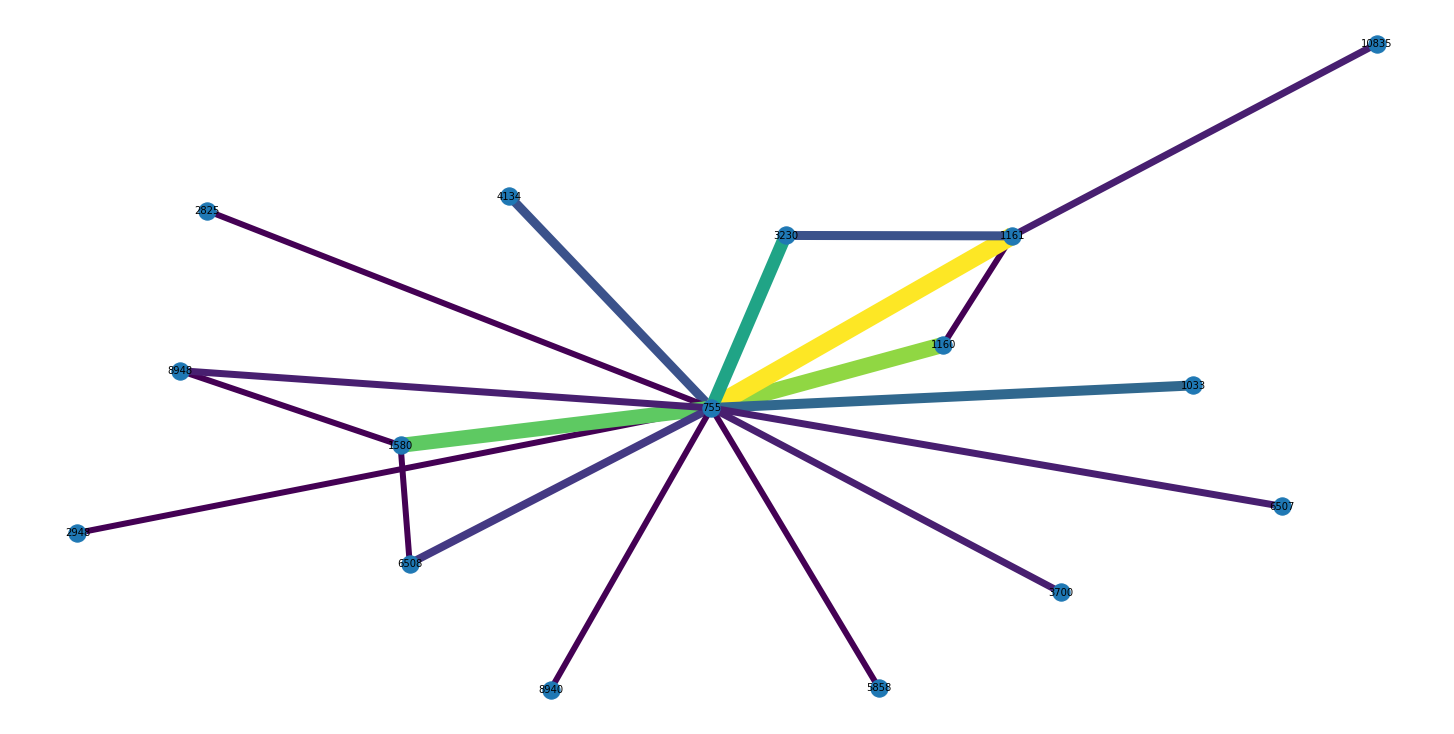

In [31]:
# Extract the subgraph with the nodes of interest: G_draw
G_draw_1 = get_nodes_and_nbrs(G_2, nodes_of_interest_1)
#define the weight 
plt.figure(figsize=(20,10))
#defining weights - reference Book Social Network Analysis page 104
weight=[edata['weight'] for f,t,edata in G_draw_1.edges(data=True)]
nx.draw(G_draw_1, width=weight, edge_color=weight, with_labels=True, font_size=10)
plt.axis("off")
plt.show()

The above graph shows us the author 755's connection with other author and their connection with each other in the same island. Let's look at the second author on the list, author # 80.

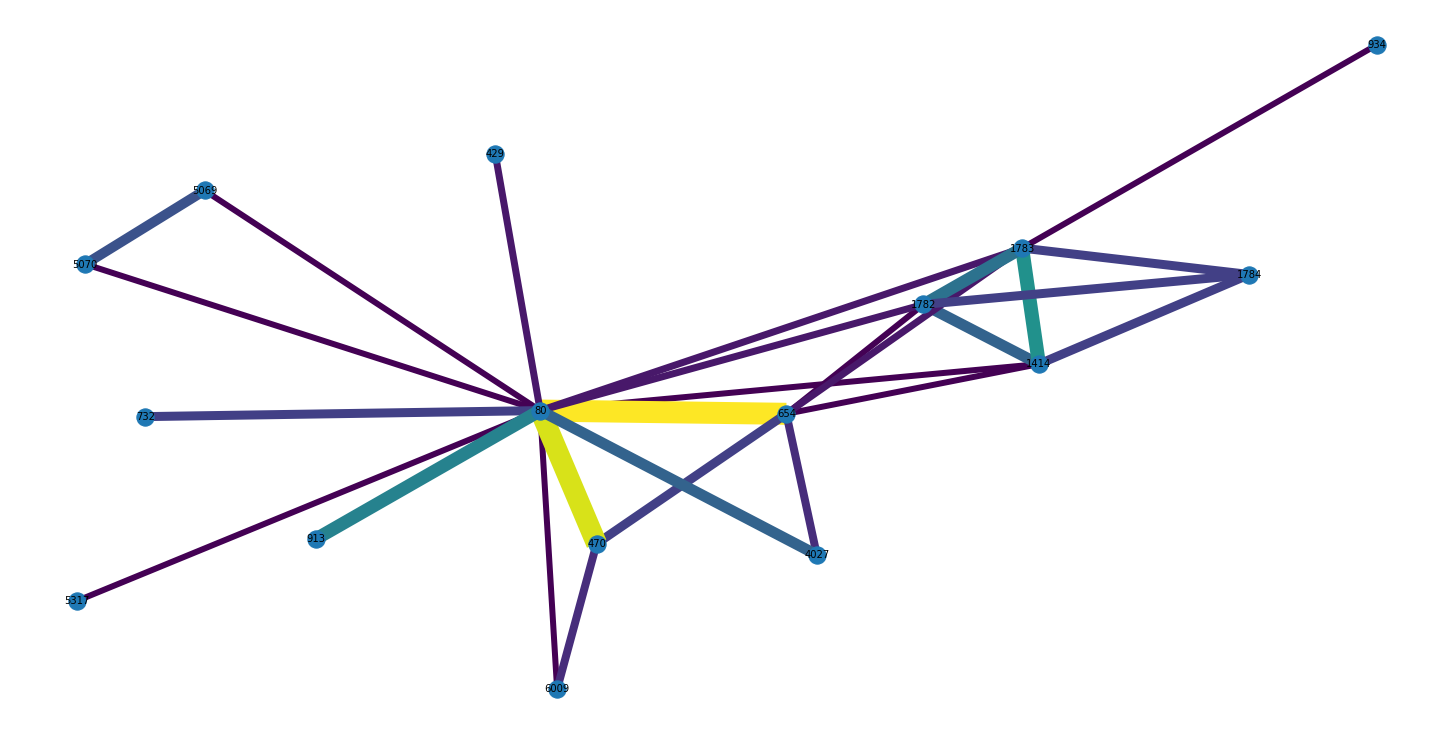

In [32]:
triangle_2 = nodes_in_triangle(G_2, 80)
nodes_of_interest_2 = triangle_2
# Extract the subgraph with the nodes of interest: G_draw
G_draw_2 = get_nodes_and_nbrs(G_2, nodes_of_interest_2)
#define the weight 
plt.figure(figsize=(20,10))
#defining weights - reference Book Social Network Analysis page 104
weight=[edata['weight'] for f,t,edata in G_draw_2.edges(data=True)]
nx.draw(G_draw_2, width=weight, edge_color=weight, with_labels=True, font_size=10)
plt.axis("off")
plt.show()

We can also look at the strongest author associations within the G_2 we created.

In [33]:
strongest_author_associations = pd.DataFrame.from_dict(nx.get_edge_attributes(G_2, 'weight'), orient='index', columns=['Weight']) \
.sort_values(by=['Weight'], ascending=False).head(10)
strongest_author_associations

,Weight
"(1529, 1530)",37
"(646, 762)",32
"(1030, 1031)",29
"(4, 6)",23
"(80, 654)",22
"(775, 776)",22
"(80, 470)",21
"(1622, 2497)",21
"(559, 560)",20
"(1786, 1853)",20


Based on the weight, the strongest author associations are author 1529 # 1530.We can look at which other authors these top strongly associated authors are connected to. To see if they are in clusters.

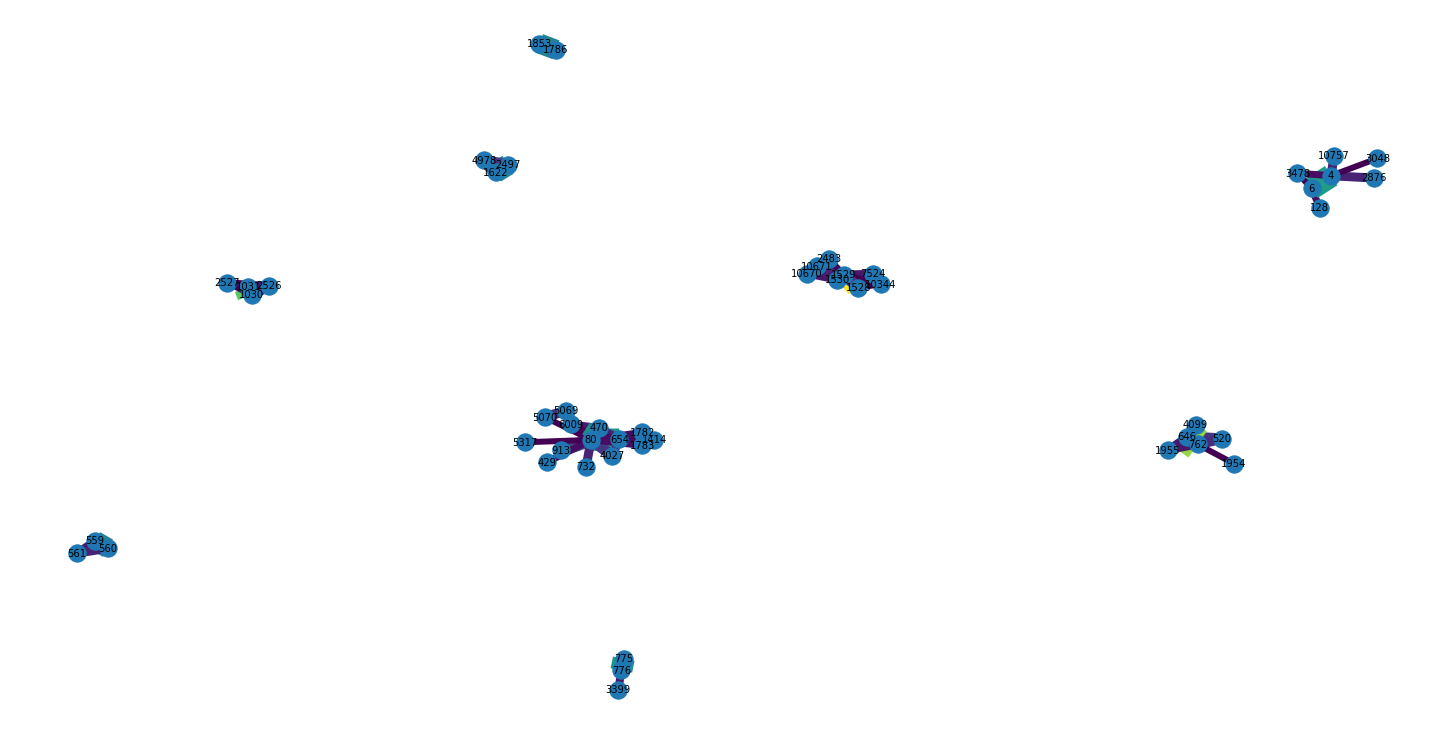

In [34]:
strongest_triangles = [1529,1530,646,762,1030,1031,4,6,80,654,775,776,80,470,1622,2497,559,560,1786,1853]
# Extract the subgraph with the nodes of interest: G_draw
G_draw_3 = get_nodes_and_nbrs(G_2, strongest_triangles)
#define the weight 
plt.figure(figsize=(20,10))
#defining weights - reference Book Social Network Analysis page 104
weight=[edata['weight'] for f,t,edata in G_draw_3.edges(data=True)]
nx.draw(G_draw_3, width=weight, edge_color=weight, with_labels=True, font_size=10)
plt.axis("off")
plt.show()

In above graph we see different islands and clusters of authors. Some are connected with other clusters and some arent. To summarize, we can look at the list of all authors and the number of triangles they are in.

In [35]:
triangles = nx.triangles(G_2)
df_triangles = DataFrame(list(triangles.items()),columns = ['Node','Number of Triangles']) 
df_triangles.head()

,Node,Number of Triangles
0,1,0
1,190,0
2,4,1
3,6,1
4,2876,0


We found each authors number of triangles they are in. Now let's further go in detail.

In [36]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in G_2
num_open_triangles = 0

# Iterate over all the nodes in G_2
for n in G_2.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(G_2, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)

234


In our G_2 graph which includes the authors that have the weight above 5 (meaning the sum of their contribution to the research papers are higher than 5 in terms of weight ), we see that there are 234 open triangles. We looked at the authors that had the higest degrees and degree_centrality, let's look at the authors that has the lowest number of neighbours.

In [37]:
metrics.sort_values(by=['Degree_Centrality', 'Eigenvector_Centrality'], ascending=True).head(10)

,Degree,Degree_Centrality,Eigenvector_Centrality,Closeness Centrality,Betweenness Centrality
1,1,0.000739,7.400491e-19,0.000739,0.0
190,1,0.000739,7.400491e-19,0.000739,0.0
8,1,0.000739,7.400491e-19,0.000739,0.0
9,1,0.000739,7.400491e-19,0.000739,0.0
24,1,0.000739,7.400491e-19,0.000739,0.0
2723,1,0.000739,7.400491e-19,0.000739,0.0
39,1,0.000739,7.400491e-19,0.000739,0.0
3500,1,0.000739,7.400491e-19,0.000739,0.0
40,1,0.000739,7.400491e-19,0.000739,0.0
3635,1,0.000739,7.400491e-19,0.000739,0.0


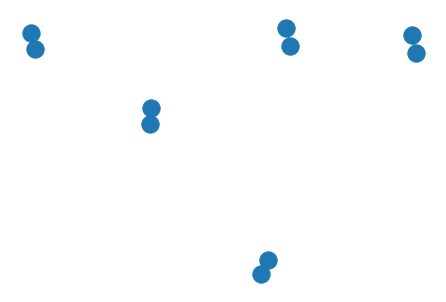

In [38]:
# Extract the nodes of interest: nodes
nodes = [1,190,8,9,24,2723,39,3500,40,3635]

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = G_2.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: G_sub
G_sub_2 = G_2.subgraph(nodeset)

# Draw G_sub_2 to the screen
nx.draw(G_sub_2)
plt.show()

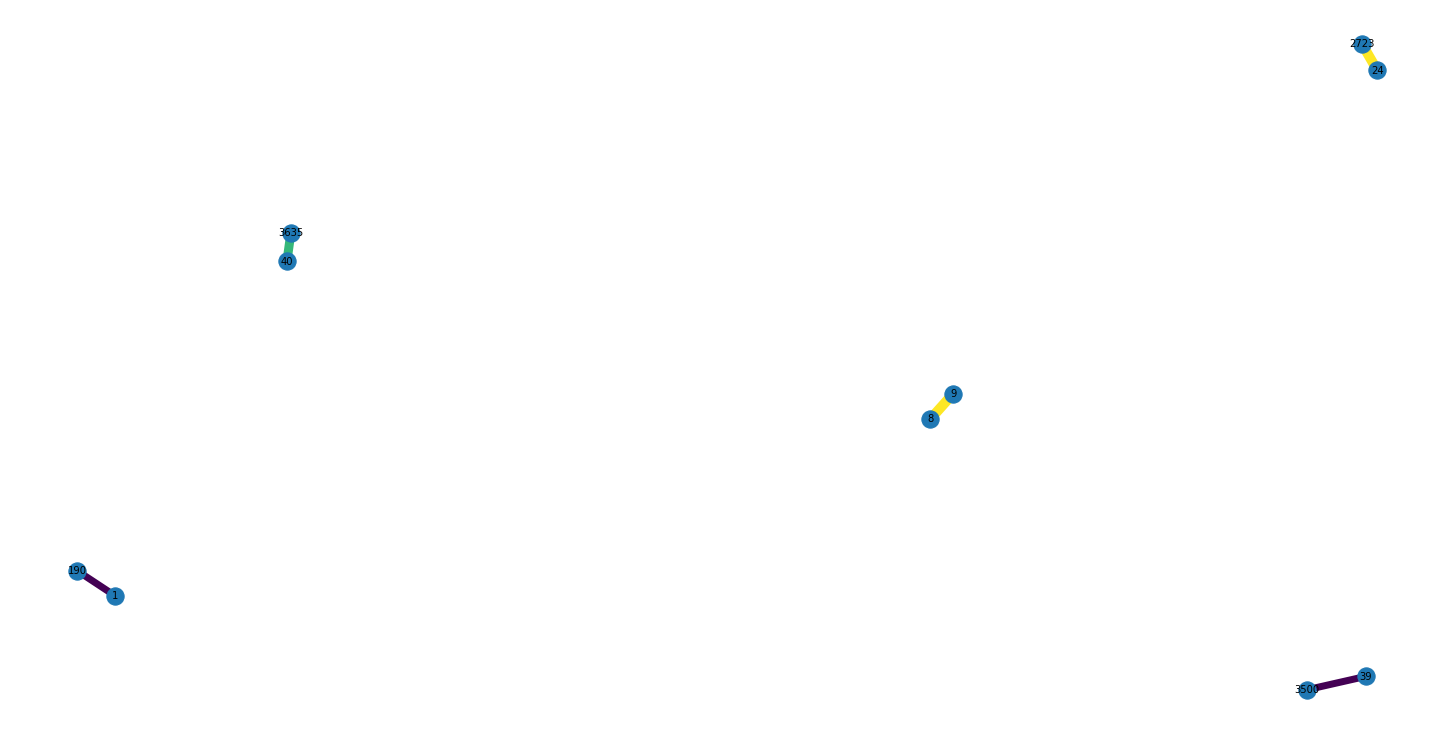

In [39]:
# Extract the subgraph with the nodes of interest: G_draw
G_draw_5 = get_nodes_and_nbrs(G_2, nodes)
#define the weight 
plt.figure(figsize=(20,10))
#defining weights - reference Book Social Network Analysis page 104
weight=[edata['weight'] for f,t,edata in G_draw_5.edges(data=True)]
nx.draw(G_draw_5, width=weight, edge_color=weight, with_labels=True, font_size=10)
plt.axis("off")
plt.show()

We can also look further to see the maximal clicks

In [40]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 33 maximal cliques of size 5 in the graph G_2
len(maximal_cliques(G_2, 5))

6